# DBSCAN + Gaussian Mixture Model

Applies DBSCAN on the space-time features, then applies GMM to separate clusters 
based on velocity and width. Unlike pure DBSCAN, it can identify mixed scatter. 
It is also much faster than GMM, running in ~15-60s on a full day of data.

Parameters for each algorithm are set to default values (shown below), but can 
be modified using the class constructor.

### Optional arguments for DBSCAN_GMM class constructor

#### DBSCAN
    
     beam_eps=3
         Determines the beam radius of the search area for DBSCAN. If this is 3, 
         two points that are 3 beams apart can still be considered part of the 
         same cluster.
         Note: DBSCAN typically has just 1 search area radius parameter, "eps". 
         This creates a spherical search area. This doesn't work well for our data, 
         so we emulate an elliptical search area by dividing each feature by its 
         epsilon value (e.g., beam = beam / beam_eps) and then set eps=1.
         
     gate_eps=1
         Determines the gate radius of the search area for DBSCAN.
         
     scan_eps=1
         Determines the scan number radius of the search area for DBSCAN. 
         If this is 1, two points must come from adjacent scans (i.e., both from 
         beam 3 in 2 subsequent measurements) to be considered neighbors.
         
     minPts=5 
         Determines the minimum number of points within one search area for the 
         points to be considered part of a core cluster.
         
     eps=1
         The classic search area radius for DBSCAN. Leave this as 1 if you want 
         to use an elliptical search area.
         
#### GMM
     n_clusters=5
         The number of GMM clusters to create within each large (>500pts) 
         DBSCAN cluster.
         
     cov='full'
         The covariance matrix to use for GMM.
         See this post for more details: 
         https://stats.stackexchange.com/questions/326671/different-covariance-types-for-gaussian-mixture-models
         
     features=['beam', 'gate', 'time', 'vel', 'wid'] 
         Names of the features for GMM to run on. Can also include 'elv'.
         
     BoxCox=False
         If BoxCox=True, 'wid' and 'vel' will be BoxCox transformed to convert 
         them from an exponential distribution to a Gaussian.

In [2]:
from algorithms.dbscan_gmm import DBSCAN_GMM
import datetime

start_time = datetime.datetime(2017, 4, 4)
end_time = datetime.datetime(2017, 4, 5)
dbgmm = DBSCAN_GMM(start_time, end_time, 'sas', BoxCox=True, load_model=False, save_model=True)
print(dbgmm.runtime)

DBSCAN+GMM clusters: 964
29.772324323654175


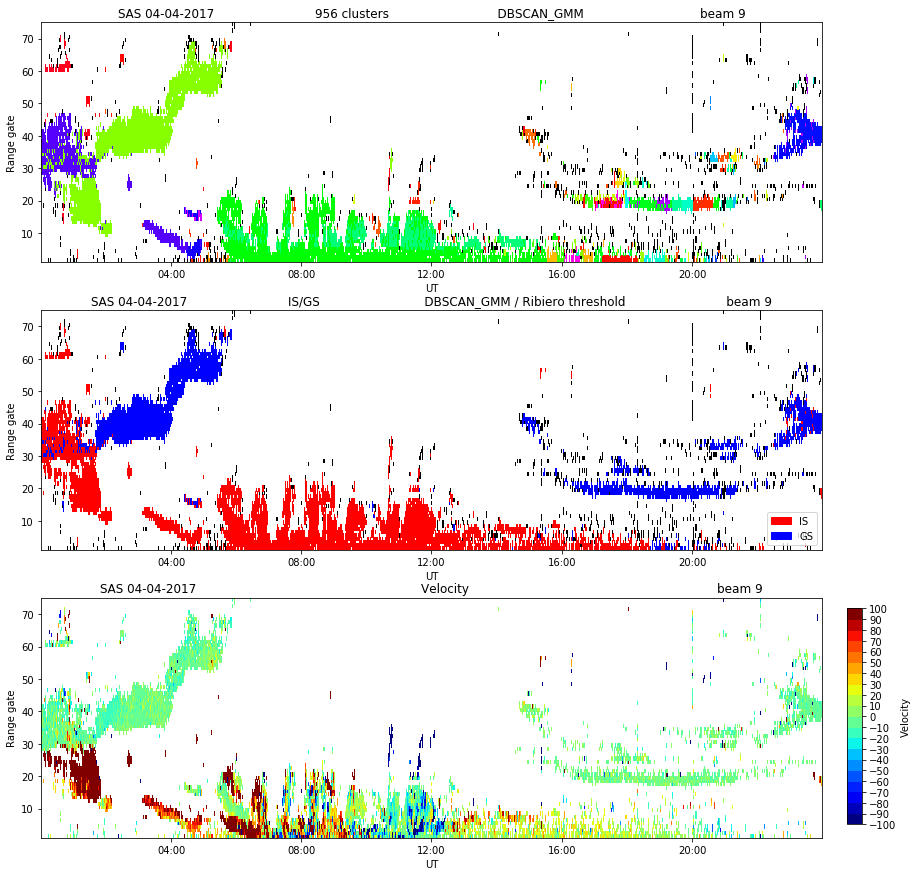

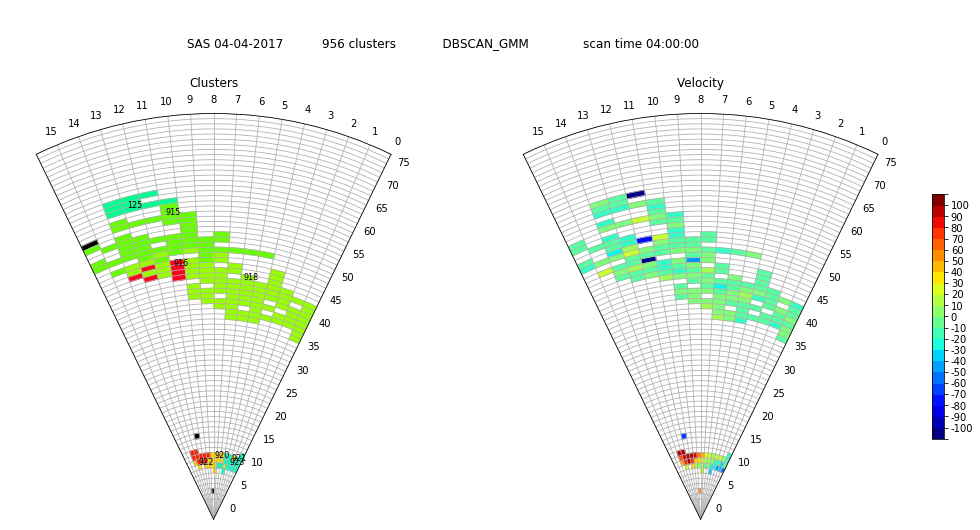

In [3]:
%matplotlib inline
# Make RTI plots to compare AJ's threshold with traditional threshold
dbgmm.plot_rti(9, 'Ribiero', save_fig=True, vel_max=100, vel_step=10)           # Each of these take ~1 minute
# Make fanplots of the individual clusters over some time period
fanplot_start =  datetime.datetime(2017, 4, 4, 4, 0, 0)
fanplot_end =  datetime.datetime(2017, 4, 4, 4, 0, 0)
dbgmm.plot_fanplots(fanplot_start, fanplot_end, save_fig=True, vel_max=100, vel_step=10)